# Various examples with the Spectrum object

In [1]:
# Reload
%load_ext autoreload
%autoreload 2

from becquerel import Spectrum
import numpy as np
np.random.seed(0)

## Basic properties

Let's load a spectrum from a file and look at some of its basic properties.

In [2]:
spec = Spectrum.from_file('../tests/samples/1110C NAA cave pottery.Spe')

SpeFile: Reading file ../tests/samples/1110C NAA cave pottery.Spe


How many channels?

In [3]:
len(spec)

16384

Did an energy calibration get loaded from the file?

In [4]:
spec.is_calibrated

True

When was this spectrum acquired? How long is it?

In [5]:
print(spec.start_time)
print(spec.stop_time)
print(spec.realtime)
print(spec.livetime)

2017-04-25 12:54:27
2017-04-25 17:30:24
16557.0
16543.0


Let's take a look at the counts in some of the bins.

In [6]:
spec.counts_vals[7980:8010]

array([ 7.,  9.,  3.,  4.,  6.,  8.,  2.,  7.,  8., 12.,  6.,  9., 13.,
       28., 22., 19., 14., 20., 13.,  9., 15.,  6.,  5.,  5.,  3.,  1.,
        2.,  1.,  0.,  0.])

What energy are those bins at?

In [7]:
spec.energies_kev[7980:8010]

array([1458.69631121, 1458.87910415, 1459.06189709, 1459.24469003,
       1459.42748296, 1459.6102759 , 1459.79306883, 1459.97586177,
       1460.1586547 , 1460.34144763, 1460.52424056, 1460.70703348,
       1460.88982641, 1461.07261933, 1461.25541226, 1461.43820518,
       1461.6209981 , 1461.80379102, 1461.98658394, 1462.16937685,
       1462.35216977, 1462.53496268, 1462.71775559, 1462.9005485 ,
       1463.08334141, 1463.26613432, 1463.44892723, 1463.63172013,
       1463.81451304, 1463.99730594])

## Uncertainties, CPS, coarser binning

The counts include uncertainty by default.

In [8]:
print('counts: {}'.format(spec.counts[7990:7997]))
print('counts_vals: {}'.format(spec.counts_vals[7990:7997]))
print('counts_uncs: {}'.format(spec.counts_uncs[7990:7997]))

counts: [6.0+/-2.449489742783178 9.0+/-3.0 13.0+/-3.605551275463989
 28.0+/-5.291502622129181 22.0+/-4.69041575982343 19.0+/-4.358898943540674
 14.0+/-3.7416573867739413]
counts_vals: [ 6.  9. 13. 28. 22. 19. 14.]
counts_uncs: [2.44948974 3.         3.60555128 5.29150262 4.69041576 4.35889894
 3.74165739]


We also have access to CPS, and CPS/keV, with their values and uncertainties.

In [9]:
print('cps:      {}'.format(spec.cps[7990:7997]))
print('cps_vals: {}'.format(spec.cps_vals[7990:7997]))
print('cps_uncs: {}'.format(spec.cps_uncs[7990:7997]))
print()
print('cpskev:   {}'.format(spec.cpskev[7990:7997]))

cps:      [0.00036269116847004775+/-0.00014806804949423792
 0.0005440367527050716+/-0.00018134558423502388
 0.0007858308650184368+/-0.0002179502675127842
 0.0016925587861935563+/-0.0003198635448303924
 0.0013298676177235084+/-0.00028352872875678106
 0.0011485220334884845+/-0.0002634890251792706
 0.0008462793930967781+/-0.0002261776816039377]
cps_vals: [0.00036269 0.00054404 0.00078583 0.00169256 0.00132987 0.00114852
 0.00084628]
cps_uncs: [0.00014807 0.00018135 0.00021795 0.00031986 0.00028353 0.00026349
 0.00022618]

cpskev:   [0.001984164117225736+/-0.0008100316088571466
 0.002976246198195663+/-0.000992082066065221
 0.004299022318581503+/-0.0011923342618468994
 0.00925943275574236+/-0.001749868310944269
 0.0072752686484572095+/-0.0015510924875305908
 0.006283186607229465+/-0.001441461866543233
 0.004629716482204129+/-0.001237343776736296]


For some analyses, 16k bins might be too fine.

In [10]:
print('Current bin width: {}'.format(np.mean(spec.bin_widths)))

spec2 = spec.combine_bins(4)
print('New number of channels: {}'.format(len(spec2)))
print('New bin width: {}'.format(np.mean(spec2.bin_widths)))
print(spec2.counts_vals[1995:2005])

Current bin width: 0.18279265121922095
New number of channels: 4096
New bin width: 0.7311706048768838
[23. 23. 35. 82. 56. 31.  7.  1.  3.  2.]


Where exactly are these bins?

In [11]:
print(spec.bin_edges_kev[7980:8010])
print(spec2.bin_edges_kev[1995:2005])

[1458.60491474 1458.78770768 1458.97050062 1459.15329356 1459.3360865
 1459.51887943 1459.70167237 1459.8844653  1460.06725823 1460.25005116
 1460.43284409 1460.61563702 1460.79842995 1460.98122287 1461.1640158
 1461.34680872 1461.52960164 1461.71239456 1461.89518748 1462.0779804
 1462.26077331 1462.44356622 1462.62635914 1462.80915205 1462.99194496
 1463.17473787 1463.35753078 1463.54032368 1463.72311659 1463.90590949]
[1458.60491474 1459.3360865  1460.06725823 1460.79842995 1461.52960164
 1462.26077331 1462.99194496 1463.72311659 1464.45428819 1465.18545977]


## Spectrum arithmetic, downsampling

Let's introduce a second spectrum, a long background measurement.

In [12]:
bg = Spectrum.from_file('../tests/samples/1110C NAA cave background May 2017.spe')
print('Start time: {}'.format(bg.start_time))
print('Stop time:  {}'.format(bg.stop_time))

SpeFile: Reading file ../tests/samples/1110C NAA cave background May 2017.spe
Start time: 2017-04-26 11:05:11
Stop time:  2017-05-01 12:43:34


Since `spec` and `bg` have the same binning, we can add them together.

In [13]:
print('Pottery spectrum:    {:7.0f} counts in {:6.0f} s livetime'.format(
    np.sum(spec.counts_vals), spec.livetime))
print('Background spectrum: {:7.0f} counts in {:6.0f} s livetime'.format(
    np.sum(bg.counts_vals), bg.livetime))

spec_and_bg = spec + bg
print('Combined spectrum:   {:7.0f} counts in {:6.0f} s livetime'.format(
    np.sum(spec_and_bg.counts_vals), spec_and_bg.livetime))

Pottery spectrum:     304706 counts in  16543 s livetime
Background spectrum: 1052900 counts in 437817 s livetime
Combined spectrum:   1357606 counts in 454360 s livetime


Subtraction works differently. Subtracting counts from counts is not meaningful, but subtracting countrates is essential for background subtraction. So the subtraction operation calculates with countrates only.

In [14]:
print('Total pottery countrate:    {:6.3f}'.format(np.sum(spec.cps)))
print('Total background countrate: {:6.3f}'.format(np.sum(bg.cps)))

bgsub = spec - bg
print('Total subtracted countrate: {:6.3f}'.format(np.sum(bgsub.cps)))
print('')
print('In the K-40 peak:')
print('Pottery counts: {}'.format(spec.counts_vals[7990:7997]))
print('Pottery cps: {}'.format(spec.cps_vals[7990:7997]))
print('Background counts: {}'.format(bg.counts_vals[7990:7997]))
print('Background cps: {}'.format(bg.cps_vals[7990:7997]))
print('Subtracted cps: {}'.format(bgsub.cps[7990:7997]))

Total pottery countrate:    18.419+/- 0.034
Total background countrate:  2.405+/- 0.002


/Users/jvavrek/becquerel/becquerel/core/spectrum.py:605: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  'have been converted to CPS', SpectrumWarning)


Total subtracted countrate: 16.014+/- 0.034

In the K-40 peak:
Pottery counts: [ 6.  9. 13. 28. 22. 19. 14.]
Pottery cps: [0.00036269 0.00054404 0.00078583 0.00169256 0.00132987 0.00114852
 0.00084628]
Background counts: [251. 324. 385. 425. 444. 430. 447.]
Background cps: [0.0005733  0.00074004 0.00087936 0.00097073 0.00101412 0.00098215
 0.00102097]
Subtracted cps: [-0.00021060772124871605+/-0.00015242570634294822
 -0.00019599846748966727+/-0.00018594758741250687
 -9.353197379321284e-05+/-0.0002225103053746964
 0.0007218335745183586+/-0.00032331081219144576
 0.0003157452789381255+/-0.00028758451907495025
 0.0001663765252053434+/-0.000267712056122381
 -0.00017469512365337085+/-0.00023127539864373797]


Looks like there's no sign of K-40 in that pottery.

Counts and livetime are not meaningful in a subtracted spectrum.

We can also scale a spectrum up or down manually.

In [15]:
print(spec.counts_vals[7990:7997])
spec3 = spec * 25.7
print(spec3.counts_vals[7990:7997])
spec4 = spec / 2.3
print(spec4.counts_vals[7990:7997])

[ 6.  9. 13. 28. 22. 19. 14.]
[154.2 231.3 334.1 719.6 565.4 488.3 359.8]
[ 2.60869565  3.91304348  5.65217391 12.17391304  9.56521739  8.26086957
  6.08695652]


But if we want to simulate a shorter or weaker spectrum, downsampling will give us realistic statistics.

In [16]:
spec5 = spec.downsample(2.3)
print(spec5.counts_vals[7990:7997])

[ 2.  5.  6. 13. 14.  5.  6.]


## List mode data from an ADC

First, let's create some synthetic list-mode data of a Gaussian peak

In [17]:
import matplotlib.pyplot as plt

nsamples = 10000
nchannels = 2**14
lmd = np.random.normal(5000, 250, nsamples)

We can create a Spectrum object from the data using default settings

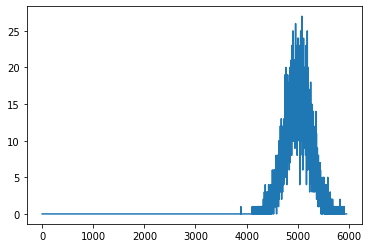

In [27]:
spec6 = Spectrum.from_listmode(lmd)
plt.plot(spec6.counts_vals)
plt.show()

Or specify bins and ranges ourselves

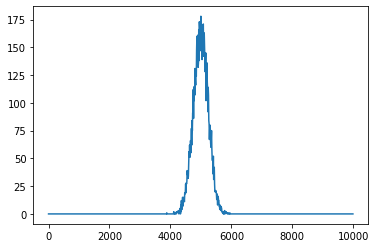

In [26]:
spec7 = Spectrum.from_listmode(lmd, bins=1000, xmin=0, xmax=10000)
plt.plot(spec7.bin_edges_kev[:-1], spec7.counts_vals)
plt.show()
# Note that the Spectrum.plot() method fails here because it works in bin mode.
# There might be a kwargs solution to that problem, but it should be fixed later.
# Note also that we still call bin_edges_kev, because bin_edges_adc has not yet been implemented.

We can even specify an array of (possibly non-uniform) bins

[18.56183818 18.64838318 18.7353317  18.82268561 18.91044681 18.99861721
 19.08719869 19.1761932  19.26560264 19.35542895 19.44567408 19.53633998
 19.62742862 19.71894195 19.81088197 19.90325067 19.99605003 20.08928207
 20.18294881 20.27705227 20.37159449 20.46657752 20.56200341 20.65787422
 20.75419203 20.85095893 20.948177   21.04584836 21.14397511 21.24255938
 21.3416033  21.44110902 21.54107868 21.64151445 21.74241851 21.84379303
 21.94564022 22.04796227 22.1507614  22.25403984 22.35779981 22.46204356
 22.56677336 22.67199145 22.77770013 22.88390168 22.9905984  23.09779259
 23.20548658 23.3136827  23.42238328 23.53159068 23.64130726 23.75153539
 23.86227747 23.97353589 24.08531305 24.19761138 24.31043329 24.42378125
 24.53765769 24.65206508 24.7670059  24.88248263 24.99849778 25.11505385
 25.23215336 25.34979886 25.46799288 25.58673798 25.70603673 25.82589172
 25.94630553 26.06728077 26.18882007 26.31092604 26.43360134 26.55684861
 26.68067053 26.80506977 26.93004902 27.05561099 27

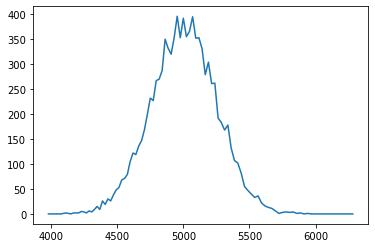

In [48]:
logbins = np.logspace(3.6, 3.8, num=100)
spec8 = Spectrum.from_listmode(lmd, bins=logbins)
print(spec8.bin_widths)
plt.plot(spec8.bin_edges_kev[:-1], spec8.counts_vals)
plt.show()